Eigangaps Heuristic

Data shape: (200, 5)

First 20 eigenvalues:
Eigenvalue 1: 4.693161111784987e-14
Eigenvalue 2: 0.06328895365210152
Eigenvalue 3: 0.14050287074770193
Eigenvalue 4: 0.16607617756273987
Eigenvalue 5: 0.2455166292175978
Eigenvalue 6: 0.3507945413291144
Eigenvalue 7: 0.43397041591321633
Eigenvalue 8: 0.46908237225649724
Eigenvalue 9: 0.6078662868664308
Eigenvalue 10: 0.6410947584585649
Eigenvalue 11: 0.6620185370089875
Eigenvalue 12: 0.6879905910198407
Eigenvalue 13: 0.704522910317511
Eigenvalue 14: 0.7266975289020455
Eigenvalue 15: 0.766340657427337
Eigenvalue 16: 0.7978091082399924
Eigenvalue 17: 0.8153685214285232
Eigenvalue 18: 0.819560646533604
Eigenvalue 19: 0.8254468759590181
Eigenvalue 20: 0.8407709655583715

Top 10 eigengaps:
Gap at index 8 (between eigenvalue 8 and 9): 0.1387839146099336
Gap at index 5 (between eigenvalue 5 and 6): 0.10527791211151663
Gap at index 6 (between eigenvalue 6 and 7): 0.08317587458410192
Gap at index 4 (between eigenvalue 4 and 5): 0.07944045165485791
Ga

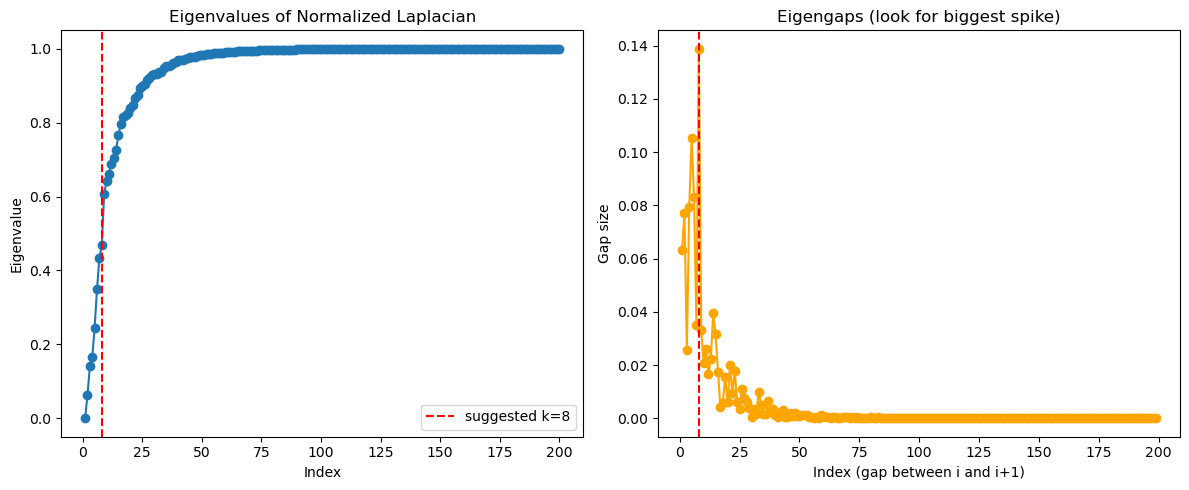

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_kernels

mall_customer_data = pd.read_csv("Mall_Customers.csv")
mall_customer_data = pd.get_dummies(mall_customer_data, drop_first=True)
mall_customer_data = mall_customer_data.ffill()

print("Data shape:", mall_customer_data.shape)

#Similarity Matrix
similarity = pairwise_kernels(mall_customer_data, metric="rbf", gamma=0.001)

#Normalization
d = similarity.sum(axis=1)
D_inv_sqrt = np.diag(1.0 / np.sqrt(d + 1e-12))
L_sym = np.eye(similarity.shape[0]) - D_inv_sqrt @ similarity @ D_inv_sqrt

#Eigen decomp
eigvals, eigvecs = np.linalg.eigh(L_sym)
eigvals = np.sort(eigvals)

#Gaps
gaps = np.diff(eigvals)

#First 20 vals
print(f"\nFirst 20 eigenvalues:")
for i, val in enumerate(eigvals[:20], start=1):
    print(f"Eigenvalue {i}: {val}")

#first top 10 gaps
top_n = 10
sorted_indices = np.argsort(gaps)[::-1][:top_n]
print(f"\nTop {top_n} eigengaps:")
for idx in sorted_indices:
    print(f"Gap at index {idx+1} (between eigenvalue {idx+1} and {idx+2}): {gaps[idx]}")

#k
k = sorted_indices[0] + 1
print("\nSuggested number of clusters (Eigengap Heuristic):", k)

#Plt
plt.figure(figsize=(12,5))

#Vals
plt.subplot(1,2,1)
plt.plot(range(1, len(eigvals)+1), eigvals, marker='o')
plt.axvline(k, color='red', linestyle='--', label=f'suggested k={k}')
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of Normalized Laplacian")
plt.legend()

#Gaps
plt.subplot(1,2,2)
plt.plot(range(1, len(gaps)+1), gaps, marker='o', color='orange')
plt.axvline(k, color='red', linestyle='--')
plt.xlabel("Index (gap between i and i+1)")
plt.ylabel("Gap size")
plt.title("Eigengaps (look for biggest spike)")

plt.tight_layout()
plt.show()
plt.close()


Silhouette Score

In [29]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

mall_customer_data = pd.read_csv("Mall_Customers.csv")
mall_customer_data = pd.get_dummies(mall_customer_data, drop_first=True)
mall_customer_data = mall_customer_data.ffill()

print("Data, shape:", mall_customer_data.shape)

#Spectral clustering
model = SpectralClustering(n_clusters=3, affinity='rbf', gamma=0.01)
labels = model.fit_predict(mall_customer_data)

#Silhouette score
score = silhouette_score(mall_customer_data, labels)
print("Silhouette Score:", score)


Data, shape: (200, 5)
Silhouette Score: 0.44814196053156236


Spectral Clustering

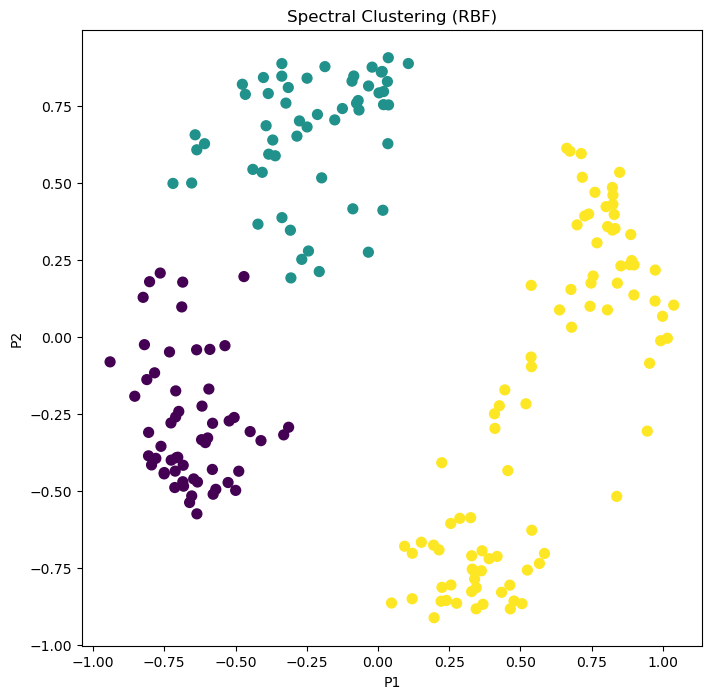

[0.004599542655847411, 0.0058874624561027055]


/opt/anaconda3/envs/Machine-Learning-Project/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


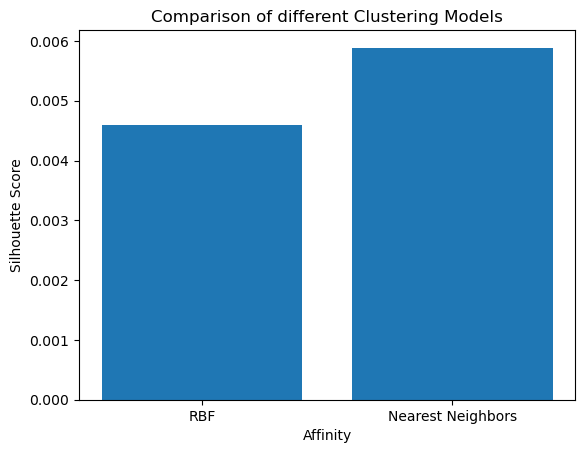

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#Load and Clean Data 
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data = pd.get_dummies(mall_data, drop_first=True)
mall_data = mall_data.drop('CustomerID', axis = 1)
mall_data = mall_data.ffill()

mall_data.head()

#Data visualization
scaler = StandardScaler()
mall_data_scaled = scaler.fit_transform(mall_data)
mall_data_normalized = normalize(mall_data_scaled)
mall_data_normalized = pd.DataFrame(mall_data_normalized)
pca = PCA(n_components = 2)
mall_data_principal = pca.fit_transform(mall_data_normalized)
mall_data_principal = pd.DataFrame(mall_data_principal)
mall_data_principal.columns = ['P1', 'P2']

mall_data_principal.head()

#Building Clustering models
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity = 'rbf')
labels_rbf = spectral_model_rbf.fit_predict(mall_data_principal)
colors = {0: 'red', 1: 'green', 2: 'yellow'}
cvec = [colors[label] for label in labels_rbf]


plt.figure(figsize =(8,8))
plt.scatter(mall_data_principal['P1'], mall_data_principal['P2'], c = labels_rbf, cmap='viridis', s=50)
plt.xlabel('P1')
plt.ylabel('P2')
plt.title('Spectral Clustering (RBF)')
plt.show()

#Nearest neighbors
spectral_model_nn = SpectralClustering(n_clusters = 3, affinity = 'nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(mall_data_principal)

#Evaluating performance
affinity = ['RBF', 'Nearest Neighbors']
s_scores = [silhouette_score(mall_data, labels_rbf), silhouette_score(mall_data, labels_nn)]

print(s_scores)

#Comparing performance
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()